<a href="https://colab.research.google.com/github/Insomnia2304/PMP-2024/blob/main/Lab09/Tema7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 7 - laborator 9
Regresie liniară

Ex. 1.

a)

<Axes: xlabel='horsepower'>

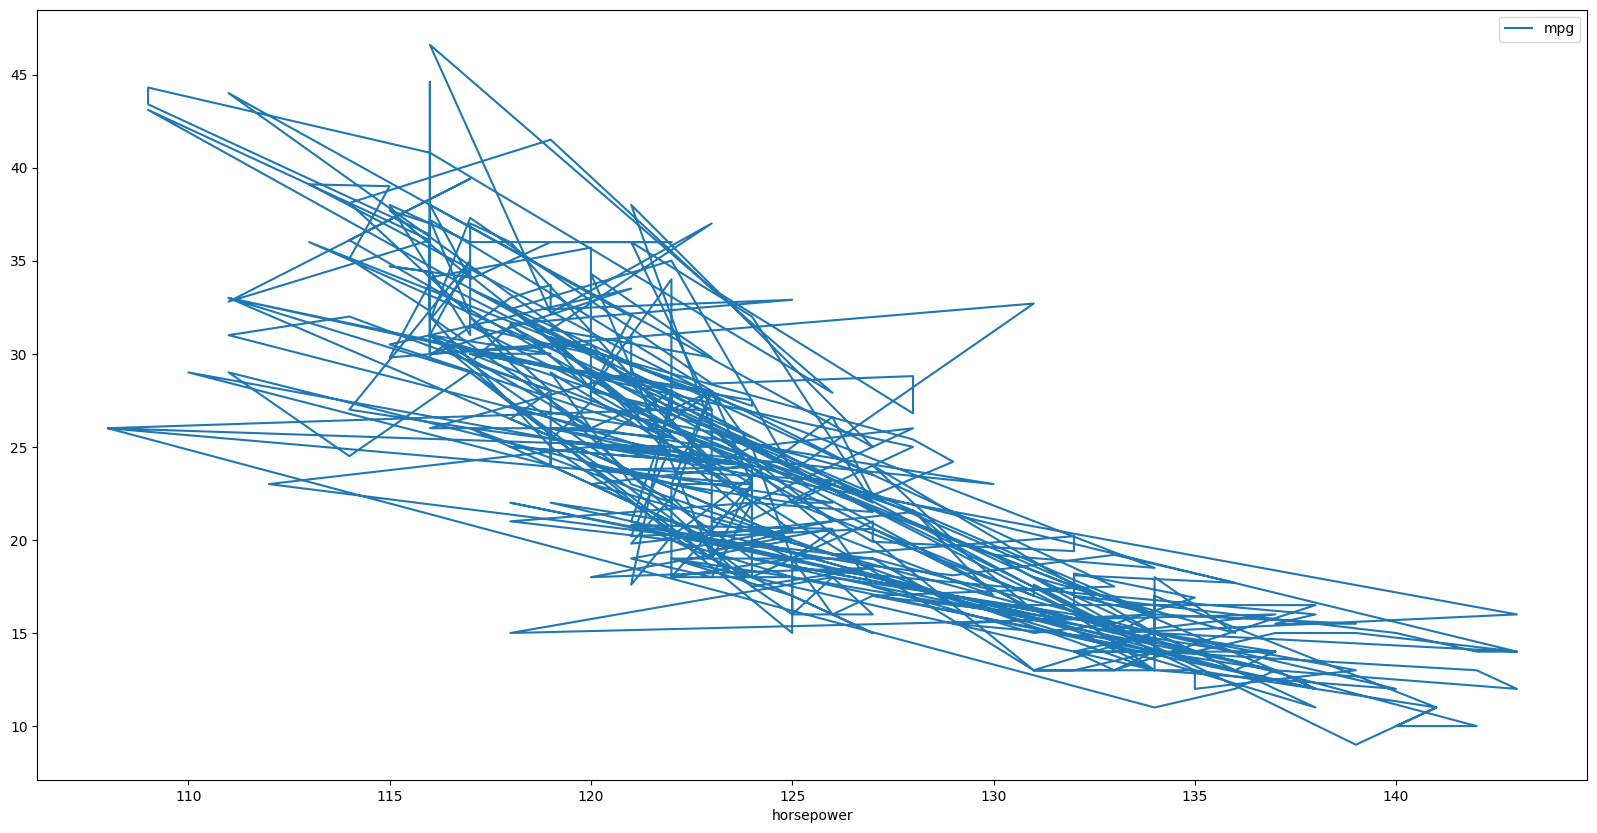

In [6]:
import pandas as pd

df = pd.read_csv('./auto-mpg.csv')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['mpg', 'horsepower'], inplace=True)
df.plot(x='horsepower', y='mpg', kind='line', figsize=(20, 10))

Se observă ușor din grafic că variabilele __mpg__ și __horsepower__ sunt invers proporționale.

b)

Output()

Output()

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'epsilon'}>,
        <Axes: title={'center': 'epsilon'}>]], dtype=object)

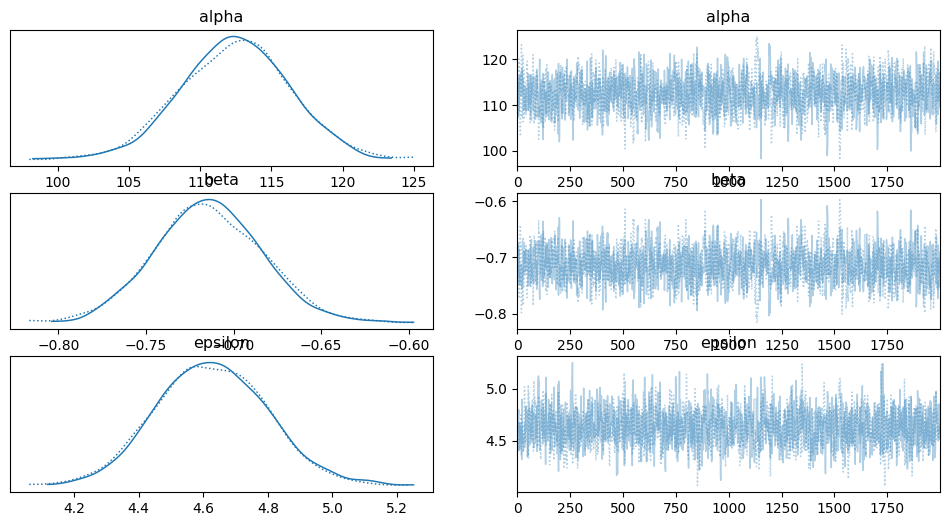

In [ ]:
import pymc as pm
import arviz as az

x = df['horsepower'] # variabila independenta
y = df['mpg'] # variabila dependenta

with pm.Model() as model_g:
  alpha = pm.Normal('alpha', mu=0, sigma=10)
  beta = pm.Normal('beta', mu=0, sigma=1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta*x)
  y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon'])

c)

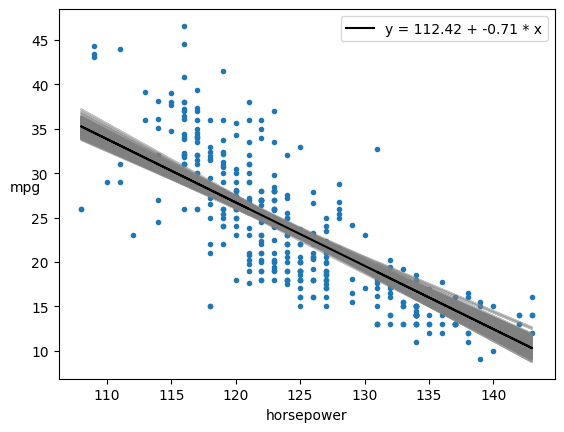

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, y, 'C0.')
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('horsepower')
plt.ylabel('mpg', rotation=0)
plt.legend()

d)

Output()

Text(0, 0.5, 'mpg')

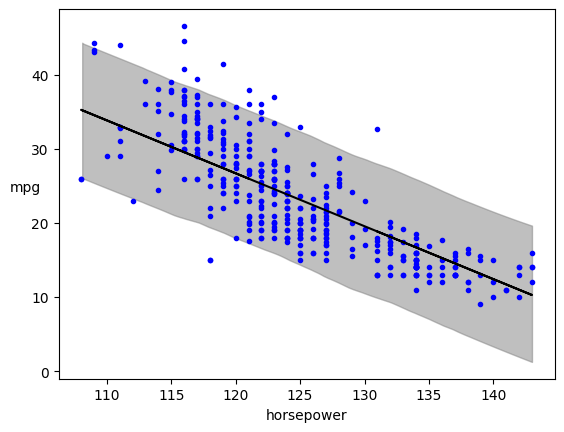

In [ ]:
ppc = pm.sample_posterior_predictive(idata_g, model=model_g)
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k',
label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.95, color='gray')
plt.xlabel('horsepower')
plt.ylabel('mpg', rotation=0)

Observăm că prin adăugarea acestui interval de credibilitate, modelul va cuprinde mult mai multe puncte de date (cu excepția câtorva zgomote) față de modelul anterior, astfel oferind predicții mult mai precise.

Ex. 2.

a)

Output()

Output()

ERROR:pymc.stats.convergence:There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


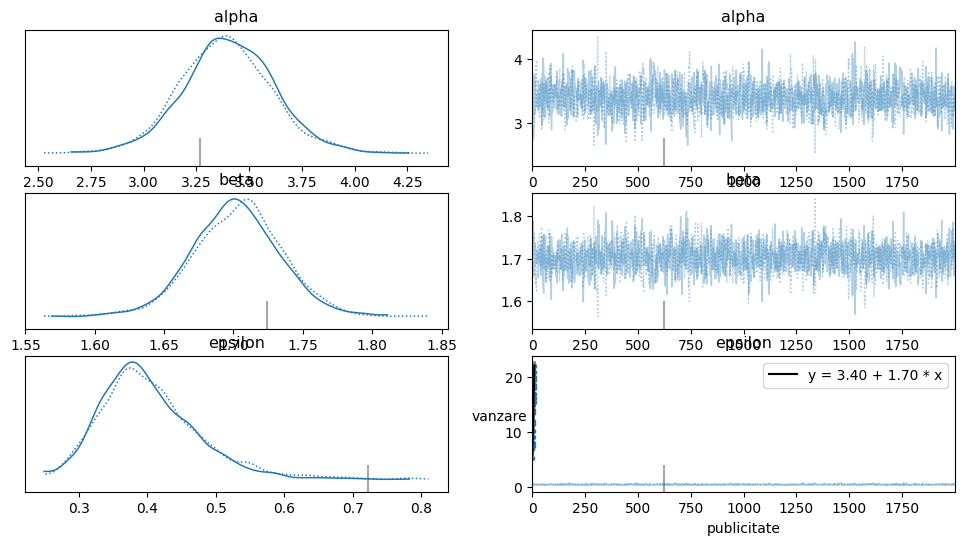

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

x = [1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
y = [5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0]

with pm.Model() as model_g:
  alpha = pm.Normal('alpha', mu=0, sigma=10)
  beta = pm.Normal('beta', mu=0, sigma=1)
  epsilon = pm.HalfCauchy('epsilon', 5)
  mu = pm.Deterministic('mu', alpha + beta*x)
  y_pred = pm.Normal('y_pred', mu=mu, sigma=epsilon, observed=y)

  idata_g = pm.sample(2000, tune=2000, return_inferencedata=True)

az.plot_trace(idata_g, var_names=['alpha', 'beta', 'epsilon'])

Text(0, 0.5, 'vanzare')

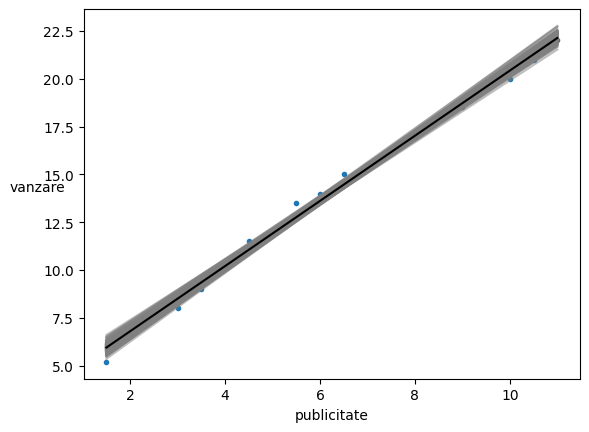

In [ ]:
plt.plot(x, y, 'C0.')
posterior_g = idata_g.posterior.stack(samples={"chain", "draw"})
alpha_m = posterior_g['alpha'].mean().item()
beta_m = posterior_g['beta'].mean().item()
draws = range(0, posterior_g.samples.size, 10)
plt.plot(x, posterior_g['alpha'][draws].values + posterior_g['beta'][draws].values * np.array(x)[:,None], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * np.array(x), c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('publicitate')
plt.ylabel('vanzare', rotation=0)

b)

Output()

       hdi_3%  hdi_97%
alpha   2.975    3.813
beta    1.643    1.762
       hdi_2.5%  hdi_97.5%
alpha     2.953      3.835
beta      1.640      1.765
       hdi_2%  hdi_98%
alpha   2.955    3.886
beta    1.640    1.773


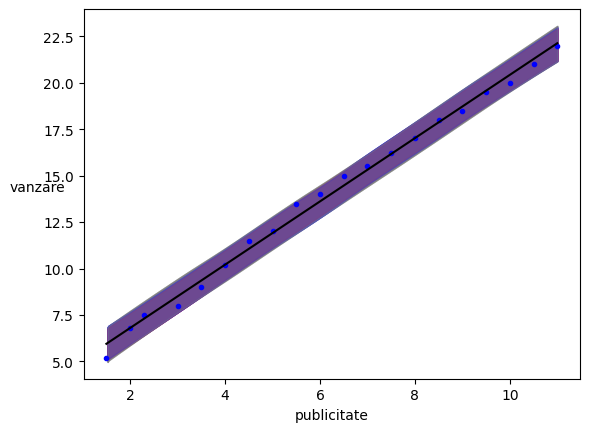

In [ ]:
ppc = pm.sample_posterior_predictive(idata_g, model=model_g)
plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * np.array(x), c='k',
label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
plt.xlabel('publicitate')
plt.ylabel('vanzare', rotation=0)

for hdi_prob in [0.94, 0.95, 0.96]:
    summary_stats = az.summary(idata_g, var_names=['alpha', 'beta'], hdi_prob=hdi_prob)
    selected_columns = summary_stats.iloc[:, [2, 3]]
    print(selected_columns)

    az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.94, color='red')
    az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.95, color='blue')
    az.plot_hdi(x, ppc.posterior_predictive['y_pred'], hdi_prob=0.96, color='gray')

c)

In [ ]:
new_x = [11.5, 12.0, 12.5, 13.0, 13.5]

alpha_samples = idata_g.posterior['alpha'].values.flatten()
beta_samples = idata_g.posterior['beta'].values.flatten()
epsilon_samples = idata_g.posterior['epsilon'].values.flatten()

for x in new_x:
    mu = alpha_samples + beta_samples * x
    y_pred = np.random.normal(mu, epsilon_samples)
    print(f'x = {x}: mean = {np.mean(y_pred)}, 95% HDI = {az.hdi(y_pred, hdi_prob=0.95)}')

x = 11.5: mean = 22.975307894776318, 95% HDI = [22.12626404 23.86994126]
x = 12.0: mean = 23.830016751453797, 95% HDI = [22.96051353 24.75924325]
x = 12.5: mean = 24.675529786207072, 95% HDI = [23.69389275 25.56575944]
x = 13.0: mean = 25.52772131904157, 95% HDI = [24.56074753 26.44157424]
x = 13.5: mean = 26.391524095813466, 95% HDI = [25.49562499 27.36947031]
